In [4]:
from scripts import fix_features 
from scripts import classify_regress
MEDIA_PATH = 'plots/'

In [5]:
predictors = classify_regress.predictors.copy()
predictors.append("avg_mood")
print(predictors)
data_clean = fix_features.get_clean_data()
data = fix_features.read_data()
data_clean.head()

['circumplex.valence', 'circumplex.arousal', 'activity', 'screen', 'appCat.communication', 'appCat.entertainment', 'appCat.social', 'avg_mood']


,id,date,daily_mood,avg_mood,activity,appCat.communication,appCat.entertainment,appCat.social,circumplex.arousal,circumplex.valence,screen,mood_category
0,AS14.01,2014-02-26,6.250000,7.02,0.095634,38.594780,48.245667,54.139183,-0.25,0.750000,65.300069,bad
1,AS14.01,2014-02-27,6.333333,7.02,0.095634,38.594780,48.245667,54.139183,0.00,0.333333,65.300069,bad
2,AS14.01,2014-03-21,6.200000,7.02,0.134050,55.095526,53.024000,75.141667,0.20,0.200000,153.665872,bad
3,AS14.01,2014-03-22,6.400000,7.02,0.236880,51.697062,46.662000,36.636000,0.60,0.500000,47.613651,bad
4,AS14.01,2014-03-23,6.800000,7.02,0.142741,53.442031,31.448667,50.046611,0.20,0.800000,67.067644,bad


### Support Vector Classification

**Without average mood**

In [6]:
# Without average mood
y_test, y_pred, SVC_accuracy = classify_regress.conduct_SVC(data_clean, classify_regress.predictors)
SVC_accuracy

0.7283464566929134

**With average mood**

In [7]:
data_clean = fix_features.get_clean_data()
data = fix_features.read_data()
# Without average mood
y_test, y_pred, SVC_accuracy = classify_regress.conduct_SVC(data_clean, predictors)
SVC_accuracy

0.7480314960629921

Confusion Matrix

In [8]:
sum(data_clean['daily_mood'] < 6)/len(data_clean)

0.0583596214511041

In [9]:
sum(data_clean['daily_mood'] < 7)

488

In [10]:
y_test

1212    good
802     good
422      bad
974     good
808     good
        ... 
163      bad
486      bad
624      bad
221     good
243      bad
Name: mood_category, Length: 254, dtype: object

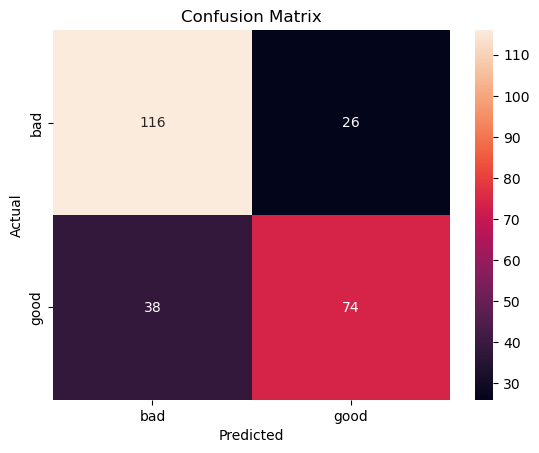

In [11]:
classify_regress.create_confusion_matrix(y_test, y_pred, save_fig=True)

In [12]:
history = classify_regress.conduct_RNN(data_clean, predictors)

KeyError: 'variable'

## Regression

**Algorithm 1: Support Vector Regression**

In [ ]:
mae, r2 = classify_regress.conduct_SVR(data_clean, predictors)
mae, r2

(0.36929108297146174, 0.5114435820102268)

**Algorithm 2: Stepwise Regression (Forward Selection)**

In [14]:
forward_model = classify_regress.forward_selection(data_clean, 'daily_mood')
forward_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             daily_mood   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     633.4
Date:                Sat, 20 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:16:07   Log-Likelihood:                -529.75
No. Observations:                1268   AIC:                             1073.
Df Residuals:                    1261   BIC:                             1110.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 3.9574      0.155     25.506      0.000       3.653       4.262
mood_category[T.good]     0.6924      0.025     27.861      0.000       0.644       0.741
circumplex_valence        0.7004      0.027     25.629      0.000       0.647       0.754
avg_mood                  0.3300      0.022     14.770      0.000       0.286       0.374
circumplex_arousal        0.0610      0.016      3.821      0.000       0.030       0.092
appCat_entertainment     -0.0003   8.71e-05     -3.019      0.003      -0.000   -9.22e-05
screen                   -0.0003      0.000     -1.982      0.048      -0.001   -3.23e-06
==============================================================================
Omnibus:                      162.577   Durbin-Watson:                   1.586
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              730.070
Skew:                          -0.521   Prob(JB):                    2.93e-159
Kurtosis:                       6.568   Cond. No.                     2.43e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""